<a href="https://colab.research.google.com/github/alharuty/PracticandoDS/blob/main/EDA_Final_Saturdays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA sobre tipos de CHOCOLATE

## Este conjunto de datos contiene valoraciones de expertos de más de 1700 barras de chocolate, junto con información sobre su origen regional, el porcentaje de cacao, la variedad de grano de chocolate utilizada y su lugar de cultivo.

Escala de calificación

4.0 - 5.0 = Sobresaliente

3.5 - 3.9 = Muy recomendable

3.0 - 3.49 = Recomendado

2.0 - 2.9 = Decepcionante

1.0 - 1.9 = Desagradable

He querido hacer un análisis corto respondiendo a las siguientes preguntas.

- ¿Cuáles son los 5 países con mejores productos?
- ¿Dónde se cultivan los mejores granos de cacao?
- La cantidad de ingredientes vs rating


El primer paso es cargar el [Dataset](https://www.kaggle.com/datasets/soroushghaderi/chocolate-bar-2020) e imprimir su información para saber si necesitamos hacer limpieza de columnas, de datos faltantes o si necesitamos añadirle otro dataset para hacer un análisis más completo.

In [1]:
import pandas as pd

df = pd.read_csv("chocolate.csv")
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2224 non-null   int64  
 1   ref                               2224 non-null   int64  
 2   company                           2224 non-null   object 
 3   company_location                  2224 non-null   object 
 4   review_date                       2224 non-null   int64  
 5   country_of_bean_origin            2224 non-null   object 
 6   specific_bean_origin_or_bar_name  2224 non-null   object 
 7   cocoa_percent                     2224 non-null   float64
 8   rating                            2224 non-null   float64
 9   counts_of_ingredients             2224 non-null   int64  
 10  beans                             2224 non-null   object 
 11  cocoa_butter                      2224 non-null   object 
 12  vanill

,0
Unnamed: 0,0
ref,0
company,0
company_location,0
review_date,0
country_of_bean_origin,0
specific_bean_origin_or_bar_name,0
cocoa_percent,0
rating,0
counts_of_ingredients,0


Como vemos en la información que nos devuelve el dataset, hay 2224 filas y 21 columnas. De estas columnas hay 3 columnas (second_taste, third_taste, fourth_taste) que tienen muchos campos vacíos aunque eso es irrelevante porque no vamos a usar dichas columnas.

Vamos a imprimir las primeras 10 filas del Dataset para entender qué tipo de datos contiene.

In [2]:
df.head(10)

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
5,5,1015,A. Morin,France,2013,Venezuela,Chuao,70.0,4.00,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,oily,nut,caramel,raspberry
6,6,1019,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,4.00,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet,cocoa,tangerine,NaN
7,7,1011,A. Morin,France,2013,Ecuador,Equateur,70.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sandy,nutty,cocoa,fig
8,8,1019,A. Morin,France,2013,Peru,Chanchamayo Province,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,sour,intense tangerine,NaN
9,9,1011,A. Morin,France,2013,Brazil,Brazil,70.0,3.25,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,mild tobacco,NaN,NaN,NaN


Ahora vamos a elegir las columnas que vamos a necesitar guardándolos en un nuevo archivo.

In [4]:
# crear nuevo dataset con las columnas que queremos
df2 = df[['ref', 'company', 'company_location', 'review_date', 'country_of_bean_origin', 'cocoa_percent', 'rating', 'counts_of_ingredients', 'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar', 'sweetener_without_sugar']]
df2.to_csv('nuevo_dataset.csv', index=False)
df2 = pd.read_csv('nuevo_dataset.csv')
df2.head(1)

,ref,company,company_location,review_date,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,2454,5150,U.S.A,2019,Madagascar,76.0,3.75,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


Además a simple vista vemos que hay columnas que tienen un string como tipo de dato, vamos a cambiarlos a booleano para poder tratarlos de forma más fácil.

In [6]:
print(df2['cocoa_butter'].unique())
print(df2['vanilla'].unique())
print(df2['lecithin'].unique())
print(df2['salt'].unique())
print(df2['sugar'].unique())
print(df2['sweetener_without_sugar'].unique())

['have_cocoa_butter' 'have_not_cocoa_butter']
['have_not_vanila' 'have_vanila']
['have_not_lecithin' 'have_lecithin']
['have_not_salt' 'have_salt']
['have_sugar' 'have_not_sugar']
['have_not_sweetener_without_sugar' 'have_sweetener_without_sugar']


In [8]:
df2['cocoa_butter'] = df2['cocoa_butter'].astype(str).replace({'have_cocoa_butter': True, 'have_not_cocoa_butter': False })
df2['vanilla'] = df2['vanilla'].astype(str).replace({'have_not_vanila': False, 'have_vanila': True})
df2['lecithin'] = df2['lecithin'].astype(str).replace({'have_not_lecithin': False, 'have_lecithin': True})
df2['salt'] = df2['salt'].astype(str).replace({'have_not_salt': False, 'have_salt': True})
df2['sugar'] = df2['sugar'].astype(str).replace({'have_sugar': True, 'have_not_sugar': False})
df2['sweetener_without_sugar'] = df2['sweetener_without_sugar'].astype(str).replace({'have_not_sweetener_without_sugar': False, 'have_sweetener_without_sugar': True})


### Ahora que tenemos el dataset limpio, procedemos a analizarlo.

## Análisis 1: PAÍSES CON MEJORES PRODUCTOS

In [9]:
df2['rating_category'] = df2['rating'].apply(lambda x:
    'Sobresaliente' if 4.0 <= x <= 5.0 else
    'Muy recomendable' if 3.5 <= x < 4.0 else
    'Recomendado' if 3.0 <= x < 3.5 else
    'Decepcionante' if 2.0 <= x < 3.0 else
    'Desagradable' if 1.0 <= x < 2.0 else
    None)

df2.head(5)


,ref,company,company_location,review_date,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,rating_category
0,2454,5150,U.S.A,2019,Madagascar,76.0,3.75,3,True,False,False,False,True,False,Muy recomendable
1,2458,5150,U.S.A,2019,Dominican republic,76.0,3.50,3,True,False,False,False,True,False,Muy recomendable
2,2454,5150,U.S.A,2019,Tanzania,76.0,3.25,3,True,False,False,False,True,False,Recomendado
3,797,A. Morin,France,2012,Peru,63.0,3.75,4,True,False,True,False,True,False,Muy recomendable
4,797,A. Morin,France,2012,Bolivia,70.0,3.50,4,True,False,True,False,True,False,Muy recomendable


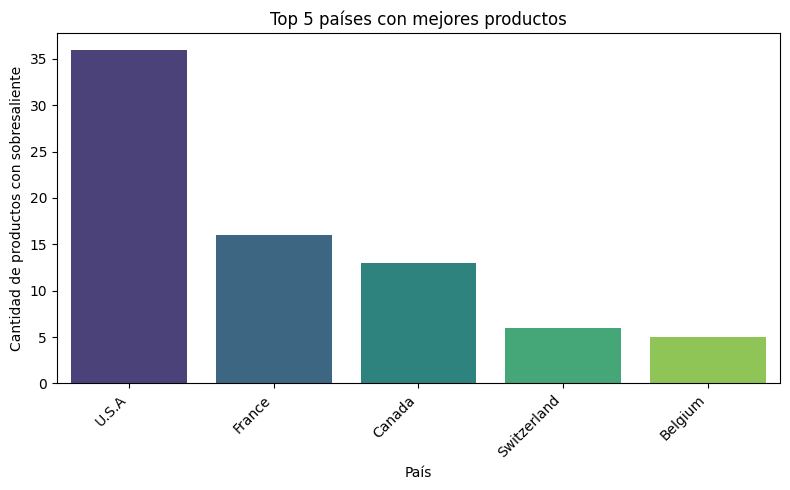

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sobresalientes = df2[df2['rating_category'] == 'Sobresaliente']

sobresalientes_por_pais = sobresalientes['company_location'].value_counts().reset_index()
sobresalientes_por_pais.columns = ['company_location', 'count']

sobresalientes_por_pais = sobresalientes_por_pais.sort_values('count', ascending=False)

top5 = sobresalientes_por_pais.head(5)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top5,
    x='company_location',
    y='count',
    palette='viridis',
    hue='company_location',
    legend=False
)
plt.title('Top 5 países con mejores productos')
plt.xlabel('País')
plt.ylabel('Cantidad de productos con sobresaliente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



En esta gráfica vemos los países donde más cantidad de "Sobresaliente" por producto tienen.

## Análisis 2: DÓNDE SE CULTIVAN LOS MEJORES GRANOS DE CACAO


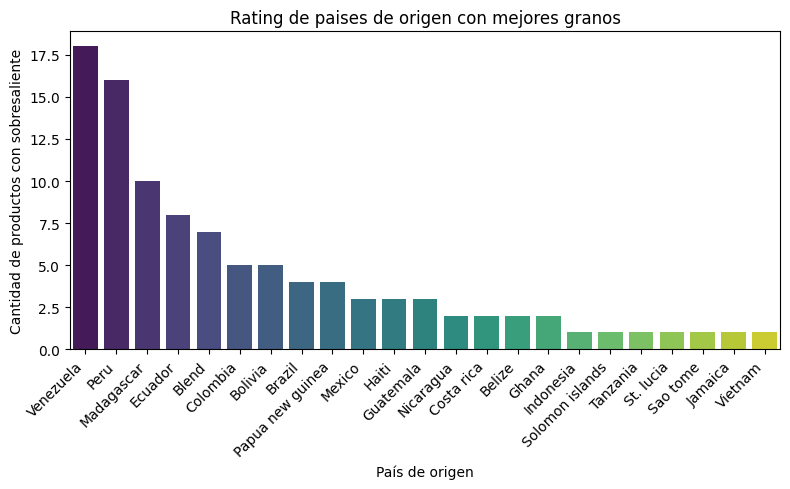

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sobresalientes_origen = df2[df2['rating_category'] == 'Sobresaliente']

sobresalientes_por_pais_origen = sobresalientes['country_of_bean_origin'].value_counts().reset_index()
sobresalientes_por_pais_origen.columns = ['country_of_bean_origin', 'count']

sobresalientes_por_pais_origen = sobresalientes_por_pais_origen.sort_values('count', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=sobresalientes_por_pais_origen,
    x='country_of_bean_origin',
    y='count',
    palette='viridis',
    hue='country_of_bean_origin',
    legend=False
)
plt.title('Rating de paises de origen con mejores granos')
plt.xlabel('País de origen')
plt.ylabel('Cantidad de granos con sobresaliente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Análisis 3: LA CANTIDAD DE INGREDIENTES VS RATING

Con esta grafica quiero saber si la cantidad de ingredientes afecta en el rating.

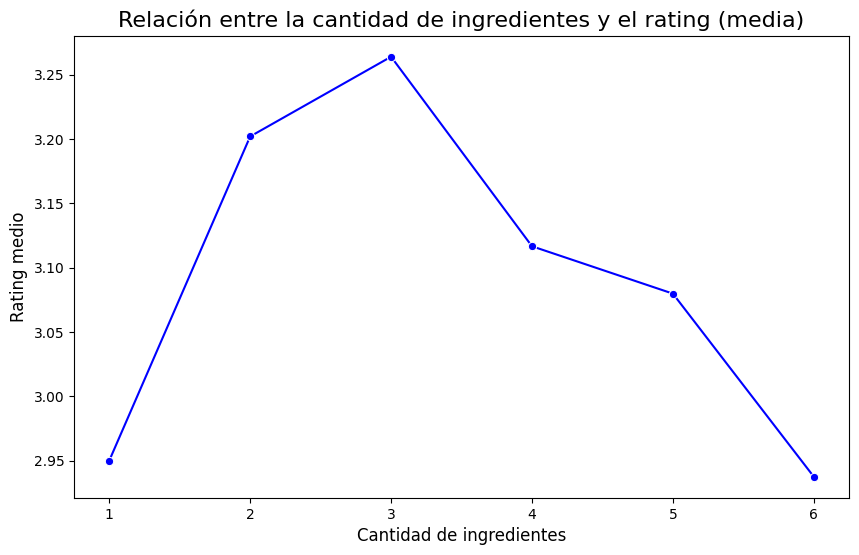

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por la cantidad de ingredientes y calcular la media de rating
mean_ratings = df2.groupby('counts_of_ingredients')['rating'].mean().reset_index()

# Creamos el gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_ratings, x='counts_of_ingredients', y='rating', marker='o', color='blue')

# Añadimos títulos y etiquetas
plt.title('Relación entre la cantidad de ingredientes y el rating (media)', fontsize=16)
plt.xlabel('Cantidad de ingredientes', fontsize=12)
plt.ylabel('Rating medio', fontsize=12)

# Mostramos el gráfico
plt.show()



Mediante esta gráfica para saber si existe alguna relación entre la cantidad de productos y su rating podemos ver que:
- Se ve una tendencia creciente inicial, donde a medida que se agregan más ingredientes (de 1 a 3), el rating medio sube.

- Luego, a partir de 3 ingredientes, el rating empieza a caer.

- Esto sugiere una posible relación no lineal: añadir ingredientes mejora la receta hasta cierto punto, y luego puede complicarla o sobrecargarla.



FIN